In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_excel(r"C:\Users\Asus\Downloads\HR Data.xlsx")


In [10]:
df.drop(columns=['emp no', 'Employee Number', 'CF_attrition label'], inplace=True, errors='ignore')

In [11]:
df.dropna(inplace=True)

In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
    

In [13]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]



In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00        41

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

Confusion Matrix:
 [[253   0]
 [  0  41]]


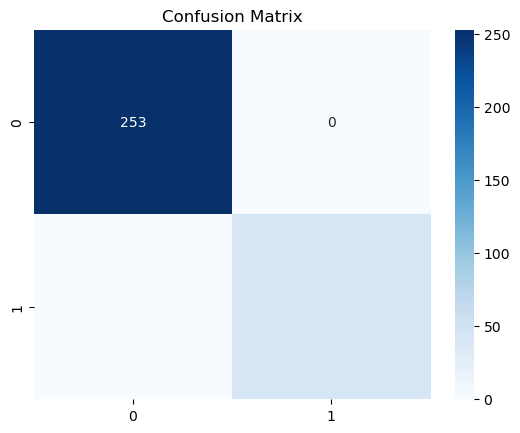

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Model Evaluation: